In [1]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-13 13:25:34.535528: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 13:25:34.548579: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 13:25:34.650149: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 13:25:37.288220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 数据准备
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = image.load_img(os.path.join(folder, filename), target_size=(64, 64))
        img = image.img_to_array(img)
        images.append(img)
    return np.array(images)

happy_images = load_images("../data/cleaned/happy/")
angry_images = load_images("../data/cleaned/angry/")
surprise_images = load_images("../data/cleaned/surprise/")

X = np.concatenate((happy_images, angry_images, surprise_images))
y = np.concatenate((np.zeros(len(happy_images)), np.ones(len(angry_images)), np.full(len(surprise_images), 2)))


In [16]:
# 模型构建
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 模型训练
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.3264 - loss: 59.3113 - val_accuracy: 0.1100 - val_loss: 1.7562
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.5187 - loss: 1.1012 - val_accuracy: 0.4700 - val_loss: 0.8613
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5798 - loss: 0.9227 - val_accuracy: 0.3000 - val_loss: 1.6036
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7544 - loss: 0.6674 - val_accuracy: 0.1000 - val_loss: 2.5594
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7642 - loss: 0.6326 - val_accuracy: 0.3800 - val_loss: 1.4363
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7820 - loss: 0.5756 - val_accuracy: 0.5000 - val_loss: 1.1913
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.8059 - loss: 0.5046 - val_accuracy: 0.5900 - val_loss: 1.0800
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.7924 - loss: 0.5097 - val_accuracy: 0

In [24]:
def max_index(l: list) -> int:
    max_element = max(l)
    max_index = None
    for index, ele in enumerate(l):
        if ele == max_element:
            max_index = index
    return max_index      

# 模型评估
test_happy_images = load_images("../data/test/happy/")
test_angry_images = load_images("../data/test/angry/")
test_surprise_images = load_images("../data/test/surprise/")
X_test = np.concatenate((test_happy_images, test_angry_images, test_surprise_images))
y_test = np.concatenate((np.zeros(len(test_happy_images)), np.ones(len(test_angry_images)), np.full(len(test_surprise_images), 2)))

y_pred = [max_index(possibility) for possibility in model.predict(X_test)]
cm = confusion_matrix(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
[[12  2  0]
 [ 0 14  0]
 [ 6  3  5]]


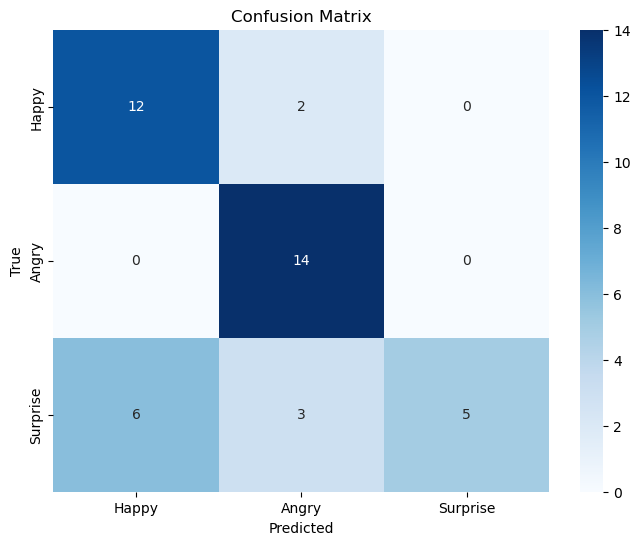

In [25]:
# 画出混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Happy', 'Angry', 'Surprise'], yticklabels=['Happy', 'Angry', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()